### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

##### By: Rohit Abraham Francis Giles

# Assignment activity 1

### My GitHub repository.
[Click here](https://github.com/rohitabraham86/LSE_DA_NHS_analysis_rohit) to go to my GitHub repository.

# Assignment activity 2

### Prepare your workstation

In [3]:
# Import the necessary libraries.
import warnings
import pandas as pd
import numpy as np
import datetime
# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Set figure size.
sns.set(rc={'figure.figsize': (15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

# Optional - Ignore warnings.
warnings.filterwarnings('ignore')

In [4]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [5]:
# Determine whether there are missing values.
print("The sum of missing values in the resepective columns are below:\n\n", ad.isna().sum())

The sum of missing values in the resepective columns are below:

 sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64


In [6]:
# Determine the metadata of the data set.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [7]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [8]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [9]:
# Determine whether there are missing values.
print("The sum of missing values in the resepective columns are below:\n\n", ar.isna().sum())

The sum of missing values in the resepective columns are below:

 icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64


In [10]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [11]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [12]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [13]:
# Determine whether there are missing values.
print("The sum of missing values in the resepective columns are below:\n\n", nc.isna().sum())

The sum of missing values in the resepective columns are below:

 appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64


In [14]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [15]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [16]:
# Determine the number of locations.
unique_loc = nc['sub_icb_location_name'].value_counts()

# Count of the unique location.
total_location = unique_loc.count()

# View the output.
print("The total locations in the data set are", total_location)
unique_loc.to_frame()

The total locations in the data set are 106


,sub_icb_location_name
NHS North West London ICB - W2U3Z,13007
NHS Kent and Medway ICB - 91Q,12637
NHS Devon ICB - 15N,12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V,12171
NHS North East London ICB - A3A8R,11837
...,...
NHS North East and North Cumbria ICB - 00N,4210
NHS Lancashire and South Cumbria ICB - 02G,4169
NHS Cheshire and Merseyside ICB - 01V,3496
NHS Cheshire and Merseyside ICB - 01T,3242


**Question 2:** What are the five locations with the highest number of records?



In [17]:
# Determine the top five locations based on record count.
unique_loc_sort = nc['sub_icb_location_name'].value_counts(
).sort_values(ascending=False)

# View the output.
print("The five locations with the highest number of records are:\n\n",
      unique_loc_sort.head().to_frame())

The five locations with the highest number of records are:

                                              sub_icb_location_name
NHS North West London ICB - W2U3Z                            13007
NHS Kent and Medway ICB - 91Q                                12637
NHS Devon ICB - 15N                                          12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V                  12171
NHS North East London ICB - A3A8R                            11837


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [18]:
# Determine the number of service settings.
ss = nc['service_setting'].value_counts()

# Count of the service settings.
total_ss = ss.count()

# View the output.
print("\nThe total service setting in the data set is", total_ss)
ss.to_frame()


The total service setting in the data set is 5


,service_setting
General Practice,359274
Primary Care Network,183790
Other,138789
Extended Access Provision,108122
Unmapped,27419


In [19]:
# Determine the number of context types.
ct = nc['context_type'].value_counts()

# Count of the context type.
total_ct = ct.count()

# View the output.
print("\nThe total context type in the data set is", total_ct)
ct.to_frame()


The total context type in the data set is 3


,context_type
Care Related Encounter,700481
Inconsistent Mapping,89494
Unmapped,27419


In [20]:
# Determine the number of national categories.
nat_c = nc['national_category'].value_counts()

# Count of the national category.
total_nat_c = nat_c.count()

# View the output.
print("\nThe total type of national category in the data set is", total_nat_c)
nat_c.to_frame()


The total type of national category in the data set is 18


,national_category
Inconsistent Mapping,89494
General Consultation Routine,89329
General Consultation Acute,84874
Planned Clinics,76429
Clinical Triage,74539
Planned Clinical Procedure,59631
Structured Medication Review,44467
Service provided by organisation external to the practice,43095
Home Visit,41850
Unplanned Clinical Activity,40415


In [21]:
# Determine the number of appointment status.
app_stat = ar['appointment_status'].value_counts()

# Count of the appointment statuses.
total_app_stat = app_stat.count()

print("\nThe total type of appointment status in the data set is", total_app_stat)
app_stat.to_frame()


The total type of appointment status in the data set is 3


,appointment_status
Attended,232137
Unknown,201324
DNA,163360


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [22]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.

print(ad.dtypes)

ad.head()

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [23]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.

print(nc.dtypes)

nc.head()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [24]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(
    ad['appointment_date'], format="%d-%b-%y")

print(ad.dtypes)
# View the DateFrame.
ad.head()

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


The date format for both nc and ad dataframe are now datetime64[ns]. Else when we check max() & min() it will take only in alphabetic order instead of the numerical date. Now we can check the following:

In [25]:
# Determine the minimum and maximum dates in the ad DataFrame.

print("The first date of scheduled date is", ad['appointment_date'].min())
print("The last date of scheduled date is", ad['appointment_date'].max())

The first date of scheduled date is 2021-12-01 00:00:00
The last date of scheduled date is 2022-06-30 00:00:00


In [26]:
# Determine the minimum and maximum dates in the nc DataFrame.

print("The first date of scheduled date is", nc['appointment_date'].min())
print("The last date of scheduled date is", nc['appointment_date'].max())

The first date of scheduled date is 2021-08-01 00:00:00
The last date of scheduled date is 2022-06-30 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

For each of these service settings, determine the number of records available for the period and the location. 

In [27]:
# Subsetting the national categories dataframe.
nc_subset = nc.loc[:, ['appointment_date', 'icb_ons_code', 'sub_icb_location_name', 'context_type',
                       'service_setting', 'national_category']]

# View the DataFrame.
nc_subset.head()

,appointment_date,icb_ons_code,sub_icb_location_name,context_type,service_setting,national_category
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Care Related Encounter,Primary Care Network,Patient contact during Care Home Round
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Care Related Encounter,Other,Planned Clinics
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Care Related Encounter,General Practice,Home Visit
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Care Related Encounter,General Practice,General Consultation Acute
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Care Related Encounter,General Practice,Structured Medication Review


In [28]:
# Setting the range.
df2 = nc[(nc['appointment_date'] >= "2022-01-01") &
         (nc['appointment_date'] <= "2022-06-01")]

df2

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
3273,2022-01-03,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Planned Clinics,10,2022-01
3274,2022-01-03,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Routine,1,2022-01
3275,2022-01-04,E54000050,NHS North East and North Cumbria ICB - 00L,Unmapped,Unmapped,Unmapped,141,2022-01
3276,2022-01-04,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinics,75,2022-01
3277,2022-01-04,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinical Procedure,11,2022-01
...,...,...,...,...,...,...,...,...
816509,2022-06-01,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Care Home Visit,5,2022-06
816510,2022-06-01,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Acute,43,2022-06
816511,2022-06-01,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,General Consultation Routine,3205,2022-06
816512,2022-06-01,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Home Visit,19,2022-06


In [29]:
# Filtering for NHS North West London. This location contains the word 'W2U3Z'.
sub_loc_W2U3Z = df2[df2['sub_icb_location_name'].apply(lambda x:
                                                       'W2U3Z' in x.title())]
sub_loc_W2U3Z

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
800289,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,496,2022-01
800290,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Clinical Triage,19,2022-01
800291,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
800292,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,16,2022-01
800293,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Planned Clinics,29,2022-01
...,...,...,...,...,...,...,...,...
806220,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,Home Visit,4,2022-06
806221,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Routine,27,2022-06
806222,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Unplanned Clinical Activity,626,2022-06
806223,2022-06-01,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Acute,224,2022-06


In [30]:
# Checking the data type.
sub_loc_W2U3Z.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [31]:
# Changing the date format to diplay like '01 January 2022'.
sub_loc_W2U3Z['appointment_date'] = sub_loc_W2U3Z['appointment_date'].dt.strftime(
    '%d %B %Y')

#### Specify the date of appointments as 1 January 2022 to 1 June 2022.

In [32]:
sub_loc_W2U3Z

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
800289,01 January 2022,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,496,2022-01
800290,01 January 2022,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Clinical Triage,19,2022-01
800291,01 January 2022,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
800292,01 January 2022,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,16,2022-01
800293,01 January 2022,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Planned Clinics,29,2022-01
...,...,...,...,...,...,...,...,...
806220,01 June 2022,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,Home Visit,4,2022-06
806221,01 June 2022,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Routine,27,2022-06
806222,01 June 2022,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Unplanned Clinical Activity,626,2022-06
806223,01 June 2022,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Acute,224,2022-06


In [33]:
sub_loc_W2U3Z.dtypes

appointment_date         object
icb_ons_code             object
sub_icb_location_name    object
service_setting          object
context_type             object
national_category        object
count_of_appointments     int64
appointment_month        object
dtype: object

#### Service Setting with the most appoinments and the number of service settings.

In [34]:
ss_data = sub_loc_W2U3Z.groupby(['service_setting', 'sub_icb_location_name'])
ss_data.agg({'sub_icb_location_name': ['count']}).sort_values(
    by=('sub_icb_location_name', 'count'), ascending=False)

,,sub_icb_location_name
,,count
service_setting,sub_icb_location_name,
General Practice,NHS North West London ICB - W2U3Z,2104
Other,NHS North West London ICB - W2U3Z,1318
Primary Care Network,NHS North West London ICB - W2U3Z,1272
Extended Access Provision,NHS North West London ICB - W2U3Z,1090
Unmapped,NHS North West London ICB - W2U3Z,152


**Question 3:** Which month had the highest number of appointments?

In [35]:
# Changing the date format of appointment month and splitting into month and year.
nc['appointment_month'] = nc['appointment_date'].dt.strftime('%Y-%m')
nc['year'] = pd.to_datetime(nc['appointment_month']).dt.year
nc['month'] = pd.to_datetime(nc['appointment_month']).dt.month

# Check the new columns.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,year,month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08,2021,8
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08,2021,8
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08,2021,8
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08,2021,8
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08,2021,8


In [36]:
month_total = nc.groupby(['year', 'month'])[
    'count_of_appointments'].sum().sort_values(ascending=False)

month_total.reset_index()

,year,month,count_of_appointments
0,2021,11,30405070
1,2021,10,30303834
2,2022,3,29595038
3,2021,9,28522501
4,2022,5,27495508
5,2022,6,25828078
6,2022,1,25635474
7,2022,2,25355260
8,2021,12,25140776
9,2022,4,23913060


**Question 4:** What was the total number of records per month?

In [37]:
rec_month = nc.groupby(['year', 'month'])['count_of_appointments'].count()
rec_month.sort_values(ascending=False).reset_index()

,year,month,count_of_appointments
0,2022,3,82822
1,2021,11,77652
2,2022,5,77425
3,2021,9,74922
4,2022,6,74168
5,2021,10,74078
6,2021,12,72651
7,2022,1,71896
8,2022,2,71769
9,2022,4,70012


# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

**Service settings:**

In [38]:
# Subsetting the national categories dataframe w.r.t. service_setting.
nc_ss = nc.loc[:, ['service_setting',
                   'appointment_month', 'count_of_appointments']]

# Checking the data type.
print(nc_ss.dtypes)

# View the DataFrame.
nc_ss.head()

service_setting          object
appointment_month        object
count_of_appointments     int64
dtype: object


,service_setting,appointment_month,count_of_appointments
0,Primary Care Network,2021-08,3
1,Other,2021-08,7
2,General Practice,2021-08,79
3,General Practice,2021-08,725
4,General Practice,2021-08,2


In [39]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ss_grpby = nc_ss.groupby(['appointment_month', 'service_setting'])[
    ['count_of_appointments']].sum()

# View output.
nc_ss_grpby.unstack().reset_index()

appointment_month     count_of_appointments                   \
service_setting                   Extended Access Provision General Practice   
0                         2021-08                    160927         21575852   
1                         2021-09                    187906         25940821   
2                         2021-10                    209539         27606171   
3                         2021-11                    207577         27767889   
4                         2021-12                    173504         23008818   
5                         2022-01                    186375         23583053   
6                         2022-02                    196627         23305934   
7                         2022-03                    231905         27187368   
8                         2022-04                    192284         21916791   
9                         2022-05                    220511         25238620   
10                        2022-06                    209652         23680374   

                                                       
service_setting   Other Primary Care Network Unmapped  
0                449101               432448  1233843  
1                527174               530485  1336115  
2                556487               564981  1366656  
3                558784               614324  1256496  
4                464718               539479   954257  
5                457440               569044   839562  
6                456153               585300   811246  
7                530677               702176   942912  
8                437402               606270   760313  
9                503327               712280   820770  
10               478813               700599   758640

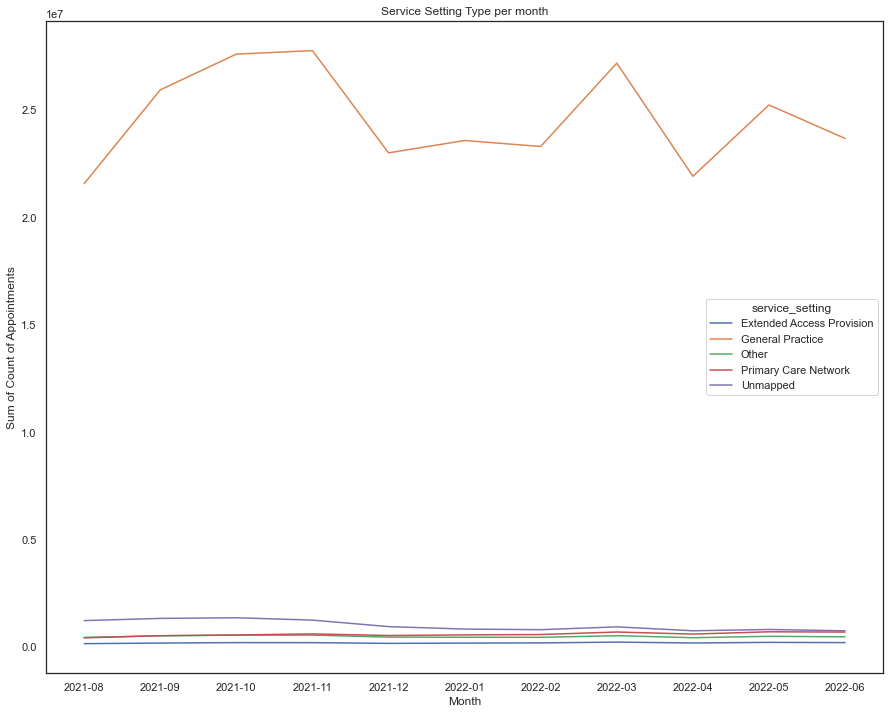

In [103]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
ans = sns.lineplot(data=nc_ss_grpby, x="appointment_month", y="count_of_appointments",
                   hue="service_setting", ci=None)
ans.set(xlabel="Month",
        ylabel="Sum of Count of Appointments",
        title="Service Setting Type per month")
# Save plot
plt.savefig('ans.png')

**Context types:**

In [41]:
# Subsetting the national categories dataframe w.r.t. context_type.
nc_ct = nc.loc[:, ['appointment_month',
                   'count_of_appointments', 'context_type']]

# Checking the data type.
print(nc_ct.dtypes)

# View the DataFrame.
nc_ct.head()

appointment_month        object
count_of_appointments     int64
context_type             object
dtype: object


,appointment_month,count_of_appointments,context_type
0,2021-08,3,Care Related Encounter
1,2021-08,7,Care Related Encounter
2,2021-08,79,Care Related Encounter
3,2021-08,725,Care Related Encounter
4,2021-08,2,Care Related Encounter


In [42]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ct_grpby = nc_ct.groupby(['appointment_month', 'context_type'])[
    ['count_of_appointments']].sum()

# View output.
nc_ct_grpby.unstack().reset_index()

appointment_month  count_of_appointments                       \
context_type                   Care Related Encounter Inconsistent Mapping   
0                      2021-08               20255235              2363093   
1                      2021-09               24404251              2782135   
2                      2021-10               26125201              2811977   
3                      2021-11               26282778              2865796   
4                      2021-12               21798612              2387907   
5                      2022-01               22441947              2353965   
6                      2022-02               22211021              2332993   
7                      2022-03               25928850              2723276   
8                      2022-04               20904193              2248554   
9                      2022-05               24101243              2573495   
10                     2022-06               22621827              2447611   

                       
context_type Unmapped  
0             1233843  
1             1336115  
2             1366656  
3             1256496  
4              954257  
5              839562  
6              811246  
7              942912  
8              760313  
9              820770  
10             758640

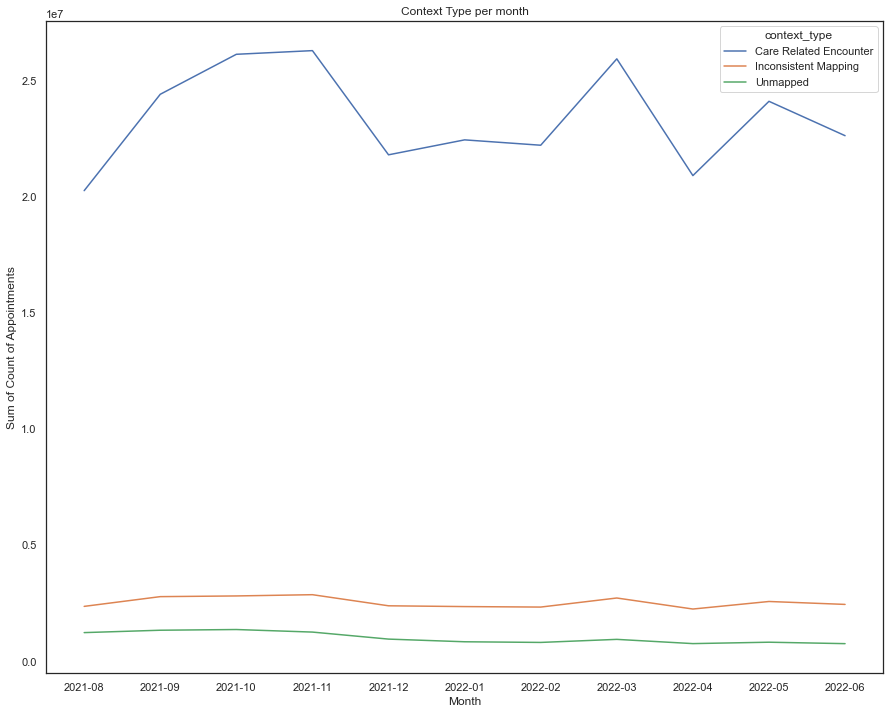

In [104]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
anc = sns.lineplot(data=nc_ct_grpby, x="appointment_month", y="count_of_appointments",
                   hue="context_type", ci=None)
anc.set(xlabel="Month",
        ylabel="Sum of Count of Appointments",
        title="Context Type per month")
# Save plot
plt.savefig('anc.png')

**National categories:**

In [44]:
# Create a separate data set that can be used in future weeks.
# Subsetting the national categories dataframe w.r.t. national_category.
nc_nc = nc.loc[:, ['appointment_month',
                   'count_of_appointments', 'national_category']]

# View the DataFrame.
nc_nc.head()

,appointment_month,count_of_appointments,national_category
0,2021-08,3,Patient contact during Care Home Round
1,2021-08,7,Planned Clinics
2,2021-08,79,Home Visit
3,2021-08,725,General Consultation Acute
4,2021-08,2,Structured Medication Review


In [45]:
# Aggregate on monthly level and determine the sum of records per month.
nc_nc_grpby = nc_nc.groupby(['appointment_month', 'national_category'])[
    ['count_of_appointments']].sum()

# View output.
nc_nc_grpby.unstack().reset_index()

appointment_month  \
national_category                     
0                           2021-08   
1                           2021-09   
2                           2021-10   
3                           2021-11   
4                           2021-12   
5                           2022-01   
6                           2022-02   
7                           2022-03   
8                           2022-04   
9                           2022-05   
10                          2022-06   

                                                                count_of_appointments  \
national_category Care Home Needs Assessment & Personalised Care and Support Planning   
0                                                                               29676   
1                                                                               33503   
2                                                                               32441   
3                                                                               38827   
4                                                                               34653   
5                                                                               37988   
6                                                                               37219   
7                                                                               43189   
8                                                                               35282   
9                                                                               42904   
10                                                                              40222   

                                                                              \
national_category Care Home Visit Clinical Triage General Consultation Acute   
0                           47583         3704207                    4280920   
1                           53519         4118862                    4834413   
2                           53713         3966561                    4843309   
3                           61816         4189237                    5265514   
4                           55230         3621415                    4689373   
5                           55860         3777487                    4787643   
6                           55078         3646672                    4767965   
7                           65413         4155846                    5581504   
8                           53715         3301285                    4548963   
9                           64806         3674229                    5208791   
10                          61546         3391163                    4882755   

                                                \
national_category General Consultation Routine   
0                                      7756045   
1                                      9060243   
2                                      9256788   
3                                      9778682   
4                                      8123938   
5                                      8645563   
6                                      8565715   
7                                     10074249   
8                                      7998377   
9                                      9320538   
10                                     8691384   

                                                                     \
national_category Group Consultation and Group Education Home Visit   
0                                                   5161     165061   
1                                                   5892     188756   
2                                                   5528     201362   
3                                                   5907     223867   
4                                                   4790     195510   
5                                                   5108     184279   
6                                                   5397     183418   
7                    

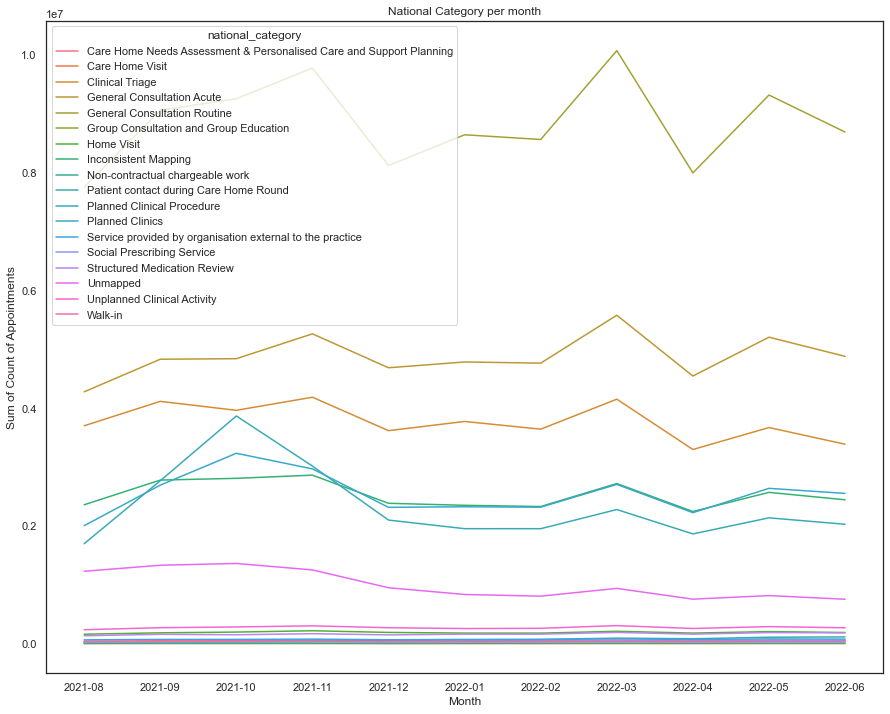

In [105]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
ann = sns.lineplot(data=nc_nc_grpby, x="appointment_month", y="count_of_appointments",
                   hue="national_category", ci=None)
ann.set(xlabel="Month",
        ylabel="Sum of Count of Appointments",
        title="National Category per month")
# Save plot
plt.savefig('ann.png')

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [47]:
# Create a separate data set that can be used in future weeks.
# Filtering for August 2021
nc_ss_aug21 = nc_ss[nc_ss['appointment_month'] == '2021-08']

# Aggregating per month
nc_ss_aug21_grpby = nc_ss_aug21.groupby(['appointment_month', 'service_setting'])[
    ['count_of_appointments']].sum()

# View output.
nc_ss_aug21_grpby.reset_index()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


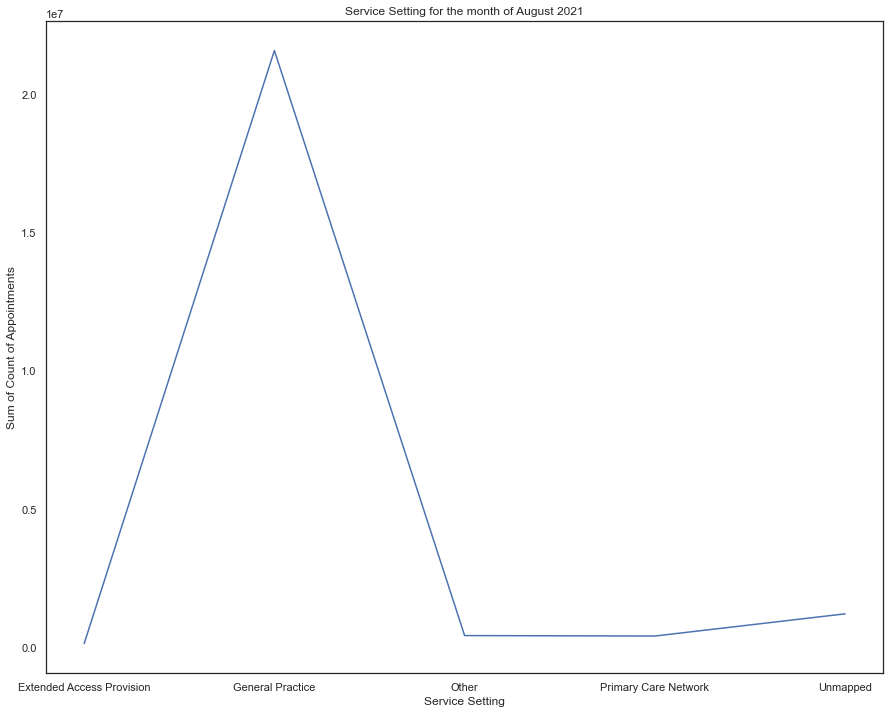

In [106]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.
aug_plot = sns.lineplot(data=nc_ss_aug21_grpby,
                        x="service_setting", y="count_of_appointments", ci=None)
aug_plot.set(xlabel="Service Setting",
             ylabel="Sum of Count of Appointments",
             title="Service Setting for the month of August 2021")
# Save plot
plt.savefig('aug_plot.png')

**Autumn (October 2021):**

In [49]:
# Create a separate data set that can be used in future weeks.
# Filtering for October 2021
nc_ss_oct21 = nc_ss[nc_ss['appointment_month'] == '2021-10']

# Aggregating per month
nc_ss_oct21_grpby = nc_ss_oct21.groupby(['appointment_month', 'service_setting'])[
    ['count_of_appointments']].sum()

# View output.
nc_ss_oct21_grpby.reset_index()

,appointment_month,service_setting,count_of_appointments
0,2021-10,Extended Access Provision,209539
1,2021-10,General Practice,27606171
2,2021-10,Other,556487
3,2021-10,Primary Care Network,564981
4,2021-10,Unmapped,1366656


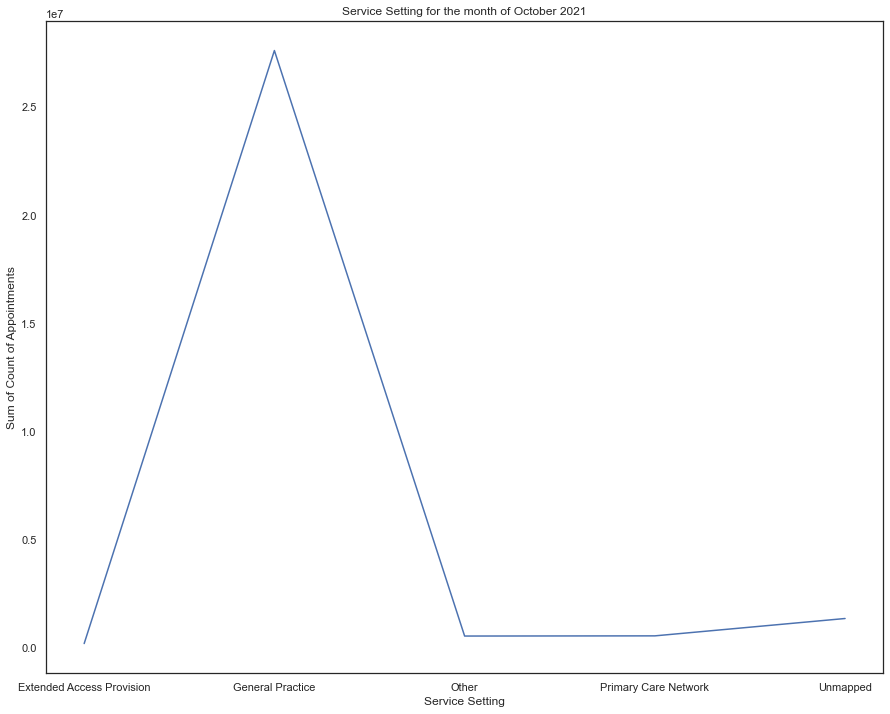

In [107]:
# Look at October 2021 in more detail to allow a closer look.
# Create a lineplot.
oct_plot = sns.lineplot(data=nc_ss_oct21_grpby,
                        x="service_setting", y="count_of_appointments", ci=None)
oct_plot.set(xlabel="Service Setting",
             ylabel="Sum of Count of Appointments",
             title="Service Setting for the month of October 2021")
# Save plot
plt.savefig('oct_plot.png')

**Winter (January 2022):**

In [51]:
# Create a separate data set that can be used in future weeks.
# Filtering for January 2022
nc_ss_jan22 = nc_ss[nc_ss['appointment_month'] == '2022-01']

# Aggregating per month
nc_ss_jan22_grpby = nc_ss_jan22.groupby(['appointment_month', 'service_setting'])[
    ['count_of_appointments']].sum()

# View output.
nc_ss_jan22_grpby.reset_index()

,appointment_month,service_setting,count_of_appointments
0,2022-01,Extended Access Provision,186375
1,2022-01,General Practice,23583053
2,2022-01,Other,457440
3,2022-01,Primary Care Network,569044
4,2022-01,Unmapped,839562


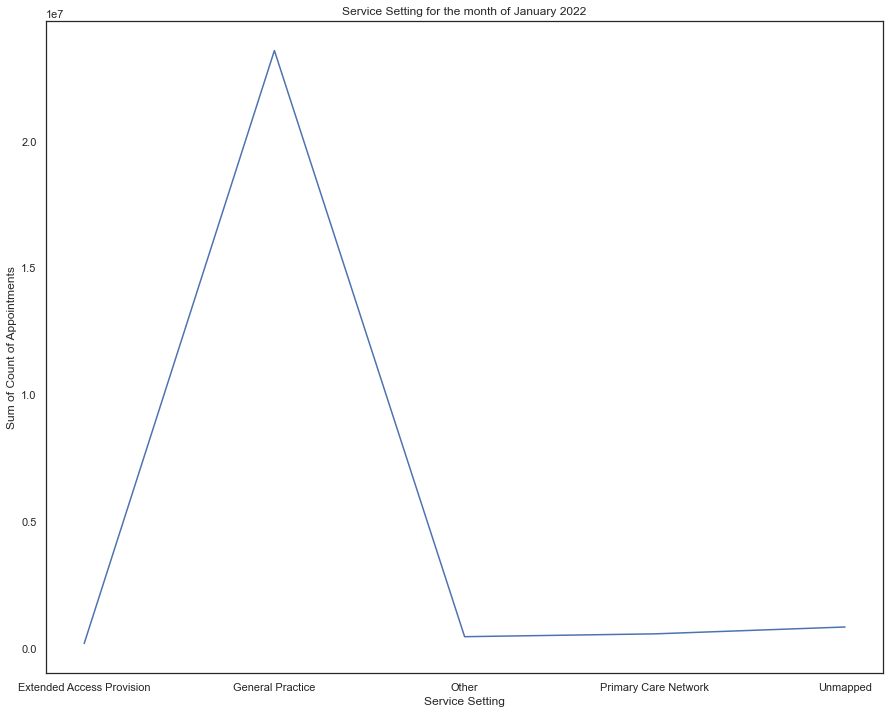

In [108]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.
jan_plot = sns.lineplot(data = nc_ss_jan22_grpby, x = "service_setting", y = "count_of_appointments", ci= None)
jan_plot.set(xlabel = "Service Setting",
             ylabel = "Sum of Count of Appointments",
             title = "Service Setting for the month of January 2022")
# Save plot
plt.savefig('jan_plot.png')

**Spring (April 2022):**

In [53]:
# Create a separate data set that can be used in future weeks.
# Filtering for April 2022
nc_ss_apr22 = nc_ss[nc_ss['appointment_month'] == '2022-04']

# Aggregating per month
nc_ss_apr22_grpby = nc_ss_apr22.groupby(['appointment_month', 'service_setting'])[
    ['count_of_appointments']].sum()

# View output.
nc_ss_apr22_grpby.reset_index()

,appointment_month,service_setting,count_of_appointments
0,2022-04,Extended Access Provision,192284
1,2022-04,General Practice,21916791
2,2022-04,Other,437402
3,2022-04,Primary Care Network,606270
4,2022-04,Unmapped,760313


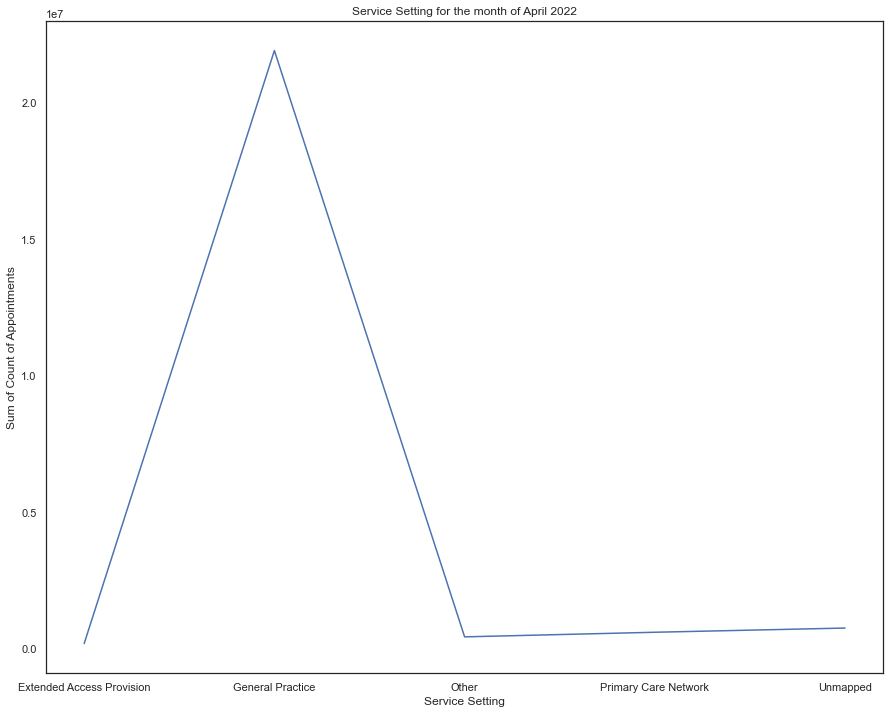

In [109]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.
apr_plot = sns.lineplot(data=nc_ss_apr22_grpby,
                        x="service_setting", y="count_of_appointments", ci=None)
apr_plot.set(xlabel="Service Setting",
             ylabel="Sum of Count of Appointments",
             title="Service Setting for the month of April 2022")
# Save plot
plt.savefig('apr_plot.png')

**Concating the Seasonal data:**

In [55]:
# Concating the seasons.
concat_seasons = pd.concat([nc_ss_aug21_grpby, nc_ss_oct21_grpby, nc_ss_jan22_grpby, nc_ss_apr22_grpby], axis=0)
concat_seasons.unstack()

count_of_appointments                           \
service_setting   Extended Access Provision General Practice   Other   
appointment_month                                                      
2021-08                              160927         21575852  449101   
2021-10                              209539         27606171  556487   
2022-01                              186375         23583053  457440   
2022-04                              192284         21916791  437402   

                                                 
service_setting   Primary Care Network Unmapped  
appointment_month                                
2021-08                         432448  1233843  
2021-10                         564981  1366656  
2022-01                         569044   839562  
2022-04                         606270   760313

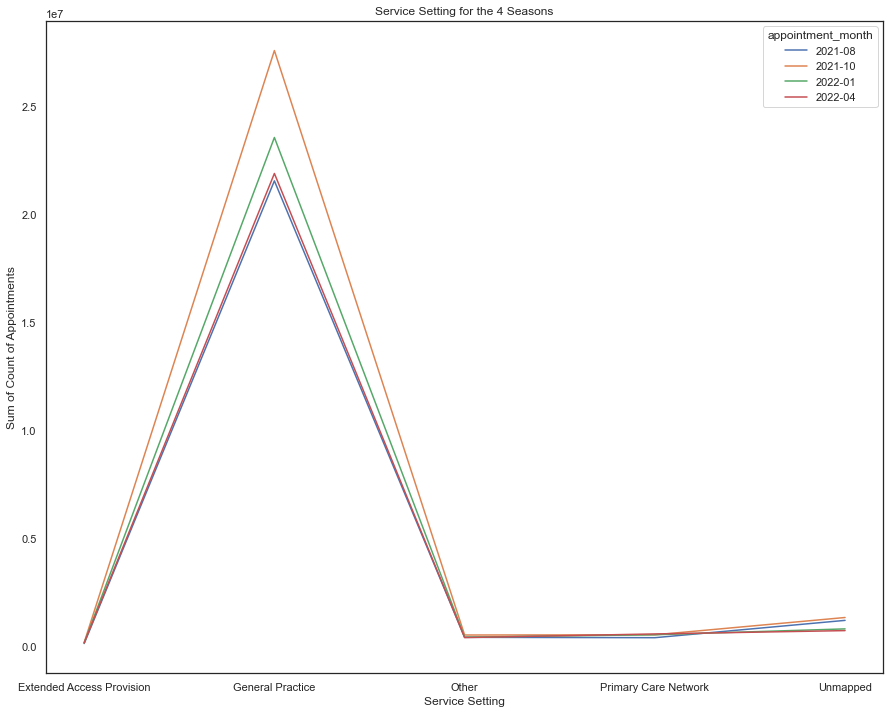

In [110]:
seasons_plot = sns.lineplot(data=concat_seasons,
                            x="service_setting", y="count_of_appointments", hue='appointment_month', ci=None)
seasons_plot.set(xlabel="Service Setting",
                 ylabel="Sum of Count of Appointments",
                 title="Service Setting for the 4 Seasons")
# Save plot
plt.savefig('seasons_plot.png')

# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [4]:
# Load the data set.
t = pd.read_csv('tweets.csv')

# View the DataFrame.
t.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [112]:
# Explore the metadata.
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [113]:
# Explore the data set.
t.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [5]:
# Check for missing values in 'tweet' dataframe.
print("The sum of missing values in the resepective columns are below:\n\n", t.isna().sum())

The sum of missing values in the resepective columns are below:

 tweet_id                     0
tweet_full_text              0
tweet_entities               0
tweet_entities_hashtags    167
tweet_metadata               0
tweet_retweet_count          0
tweet_favorite_count         0
tweet_favorited              0
tweet_retweeted              0
tweet_lang                   0
dtype: int64


In [6]:
t_rt_cnt = t['tweet_retweet_count'].value_counts()
print("tweet_retweet_count:\n", t_rt_cnt)

t_fav_cnt = t['tweet_favorite_count'].value_counts()
print("tweet_favorite_count:\n", t_fav_cnt)

tweet_retweet_count:
 0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64
tweet_favorite_count:
 0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64


In [7]:
# Create a new DataFrame containing only the text.
tweets_text = t[['tweet_full_text']]

# View the DataFrame.
tweets_text

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie..."
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC


In [8]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in t['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [9]:
# Display the first 30 records.
d = pd.Series(tags).value_counts()

# View Series.
d.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [12]:
# Convert the series to a DataFrame in preparation for visualisation.
data = pd.DataFrame(d).reset_index()

# View dataframe
data

,index,0
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [13]:
# Rename the columns.
data.rename(columns={data.columns[0]: 'word',
            data.columns[1]: 'count'}, inplace=True)

# View dataframe
data

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [14]:
# Display records where the count is larger than 10.
n_data = data.loc[data['count'] > 10]

# View the output
n_data

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


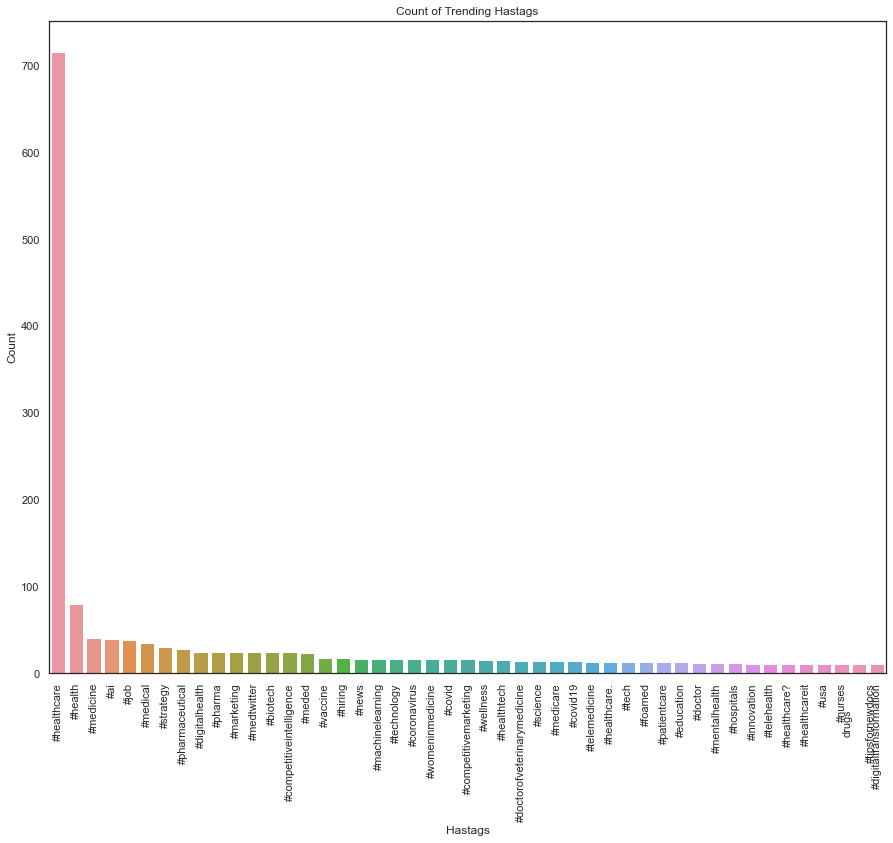

In [15]:
# Create a Seaborn barplot indicating records with a count >10 records.
g = sns.barplot(x='word', y='count', data=n_data)
g.set(xlabel="Hastags", ylabel="Count", title="Count of Trending Hastags")
g.set_xticklabels(
    labels=['#healthcare', '#health', '#medicine', '#ai', '#job', '#medical', '#strategy', '#pharmaceutical',
            '#digitalhealth', '#pharma', '#marketing', '#medtwitter', '#biotech', '#competitiveintelligence',
            '#meded', '#vaccine', '#hiring', '#news', '#machinelearning', '#technology', '#coronavirus',
            '#womeninmedicine', '#covid', '#competitivemarketing', '#wellness', '#healthtech',
            '#doctorofveterinarymedicine', '#science', '#medicare', '#covid19', '#telemedicine', '#healthcare.',
            '#tech', '#foamed', '#patientcare', '#education', '#doctor', '#mentalhealth', '#hospitals',
            '#innovation', '#telehealth', '#healthcare?', '#healthcareit', '#usa', '#nurses',
            'drugs\n\n#tipsfornewdocs', '#digitaltransformation'], rotation=90)

# Save plot
plt.savefig('trending.png')

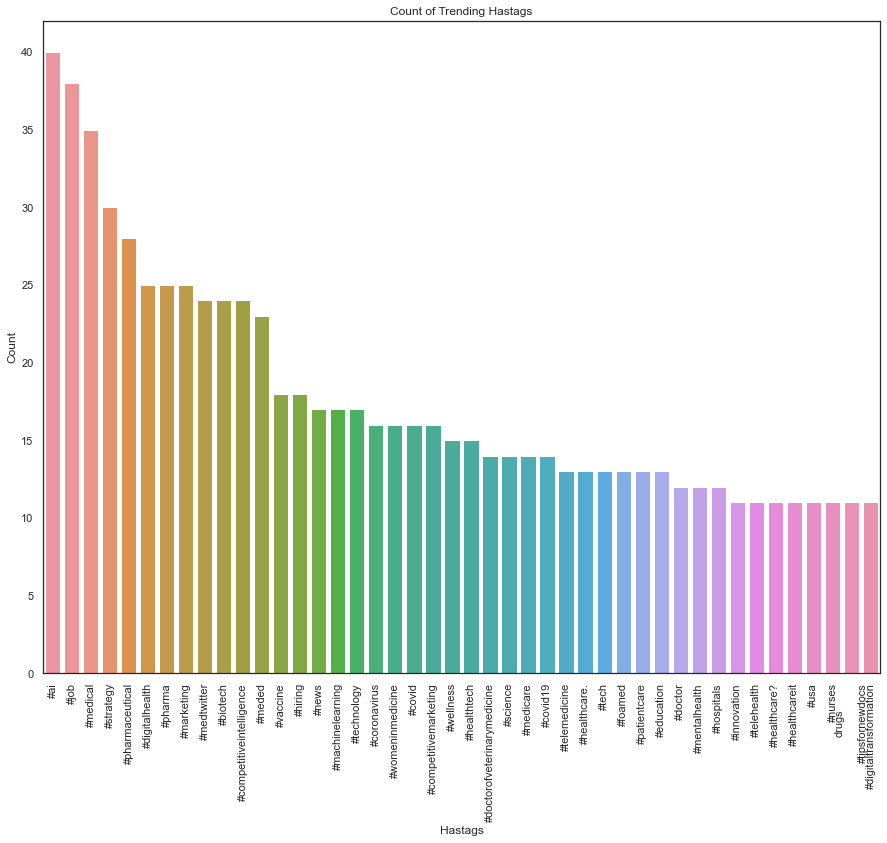

In [16]:
# Create the plot excluding the over represented hashtags.
f = sns.barplot(x='word', y='count', data=n_data.loc[n_data['count'] < 41])
f.set(xlabel="Hastags", ylabel="Count", title="Count of Trending Hastags")
f.set_xticklabels(
    labels=['#ai', '#job', '#medical', '#strategy', '#pharmaceutical', '#digitalhealth', '#pharma',
            '#marketing', '#medtwitter', '#biotech', '#competitiveintelligence', '#meded', '#vaccine',
            '#hiring', '#news', '#machinelearning', '#technology', '#coronavirus', '#womeninmedicine',
            '#covid', '#competitivemarketing', '#wellness', '#healthtech', '#doctorofveterinarymedicine',
            '#science', '#medicare', '#covid19', '#telemedicine', '#healthcare.', '#tech', '#foamed',
            '#patientcare', '#education', '#doctor', '#mentalhealth', '#hospitals', '#innovation',
            '#telehealth', '#healthcare?', '#healthcareit', '#usa', '#nurses', 'drugs\n\n#tipsfornewdocs',
            '#digitaltransformation'], rotation=90)

# Save plot
plt.savefig('trending_less_than40.png')

# Assignment activity 6

### Investigate the main cencerns posed by the NHS. 

In [138]:
# View the appointments_regional DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [141]:
# Print the min and max dates.
print("The first date of scheduled date is", ar['appointment_month'].min())
print("The last date of scheduled date is", ar['appointment_month'].max())

The first date of scheduled date is 2020-01
The last date of scheduled date is 2022-06


In [142]:
# Filter the data set to only look at data from 2021-08 onwards.
df3 = ar[(ar['appointment_month'] >= "2021-08")]

df3

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [271]:
# Create an aggregated data set to review the different features.
ar_agg = df3.loc[:, ['appointment_month', 'appointment_status', 'hcp_type',
                     'appointment_mode', 'time_between_book_and_appointment', 'count_of_appointments']]

# Aggregating the total number of appointments per month.
ar_agg_grpby = ar_agg.groupby(['appointment_month', 'hcp_type', 'appointment_status','appointment_mode',
                               'time_between_book_and_appointment'])[['count_of_appointments']].sum()

# View the DataFrame.
ar_agg_grpby.reset_index()

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,5494
3750,2022-06,Unknown,Unknown,Unknown,More than 28 Days,5115
3751,2022-06,Unknown,Unknown,Unknown,Same Day,1914
3752,2022-06,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [166]:
ar_df = df3.loc[:,['appointment_month','count_of_appointments']]

ar_df.head()


,appointment_month,count_of_appointments
3652,2021-08,6553
3653,2021-08,2390
3654,2021-08,10547
3655,2021-08,937
3656,2021-08,4961


In [167]:
# Determine the total number of appointments per month.
ar_df_grpby = ar_df.groupby(['appointment_month'])[
    ['count_of_appointments']].sum()
ar_df_grpby.reset_index()

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


In [169]:
# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df_utiliz = ar_df_grpby.assign(utiliz_percent=lambda x: round(
    x.count_of_appointments / 30 / 1200000, 1))

ar_df_utiliz

,count_of_appointments,utiliz_percent
appointment_month,,
2021-08,23852171,0.7
2021-09,28522501,0.8
2021-10,30303834,0.8
2021-11,30405070,0.8
2021-12,25140776,0.7
2022-01,25635474,0.7
2022-02,25355260,0.7
2022-03,29595038,0.8
2022-04,23913060,0.7


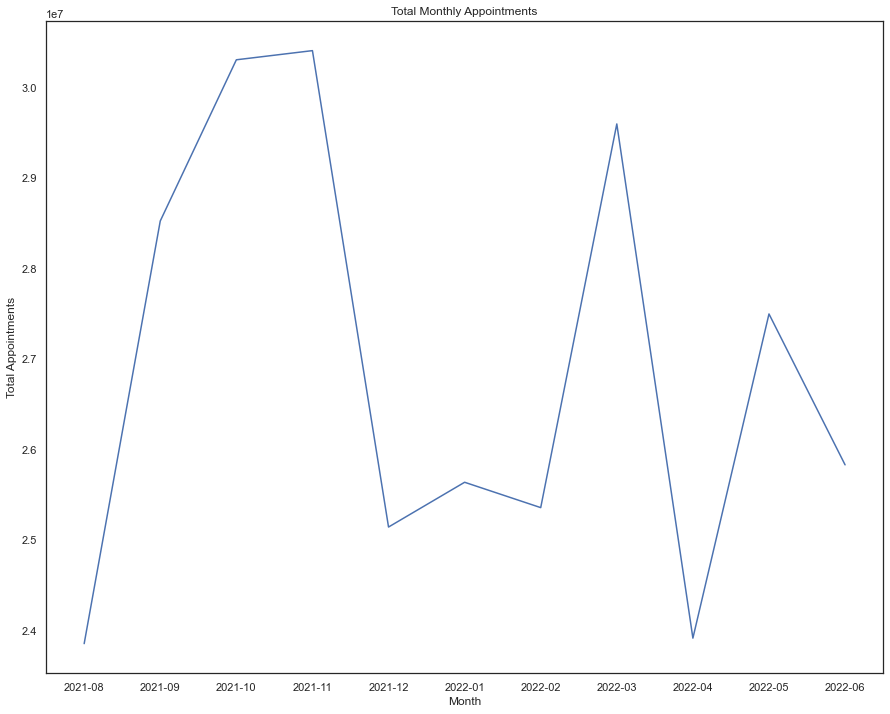

In [247]:
# Plot sum of count of monthly visits.
ax = sns.lineplot(data = ar_df_utiliz, x = "appointment_month", y = "count_of_appointments",  ci= None,)
ax.set(xlabel = "Month",
       ylabel = "Total Appointments",
       title = "Total Monthly Appointments")

# Save plot
plt.savefig('Total_Monthly_Appointments.png')

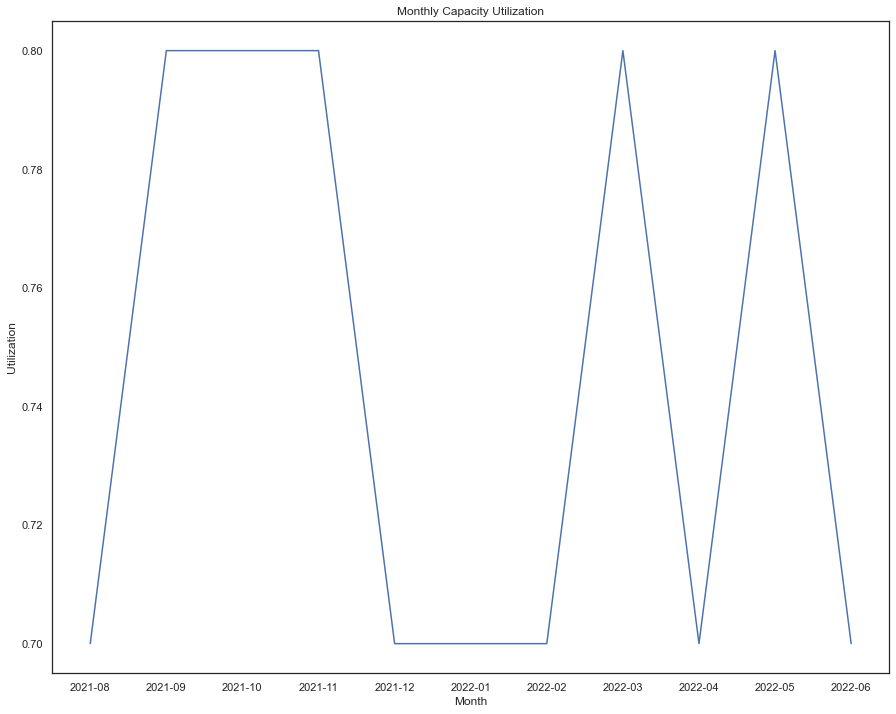

In [248]:
# Plot monthly capacity utilization.
ax = sns.lineplot(data = ar_df_utiliz, x = "appointment_month", y = "utiliz_percent",  ci= None,)
ax.set(xlabel = "Month",
       ylabel = "Utilization",
       title = "Monthly Capacity Utilization")

# Save plot
plt.savefig('Monthly_Cap_Util.png')

**Question 2:** How do the healthcare professional types differ over time?

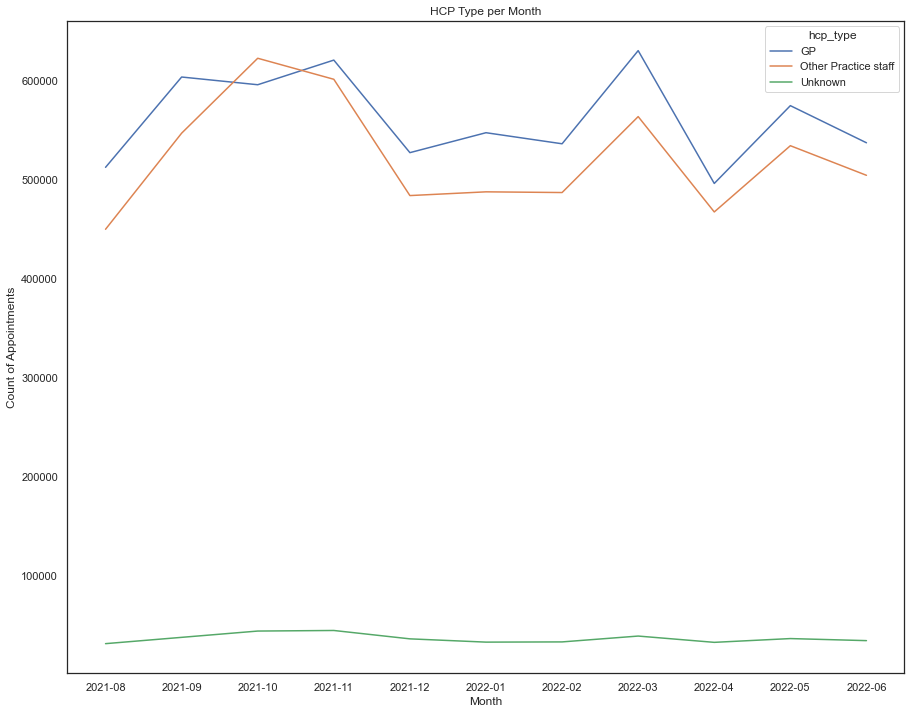

In [249]:
ax = sns.lineplot(data=ar_agg_grpby, x="appointment_month", y="count_of_appointments", hue='hcp_type',
                  ci=None)

ax.set(xlabel = "Month",
       ylabel = "Count of Appointments",
       title = "HCP Type per Month")

# Save plot
plt.savefig('HCP_month.png')

**Question 3:** Are there significant changes in whether or not visits are attended?

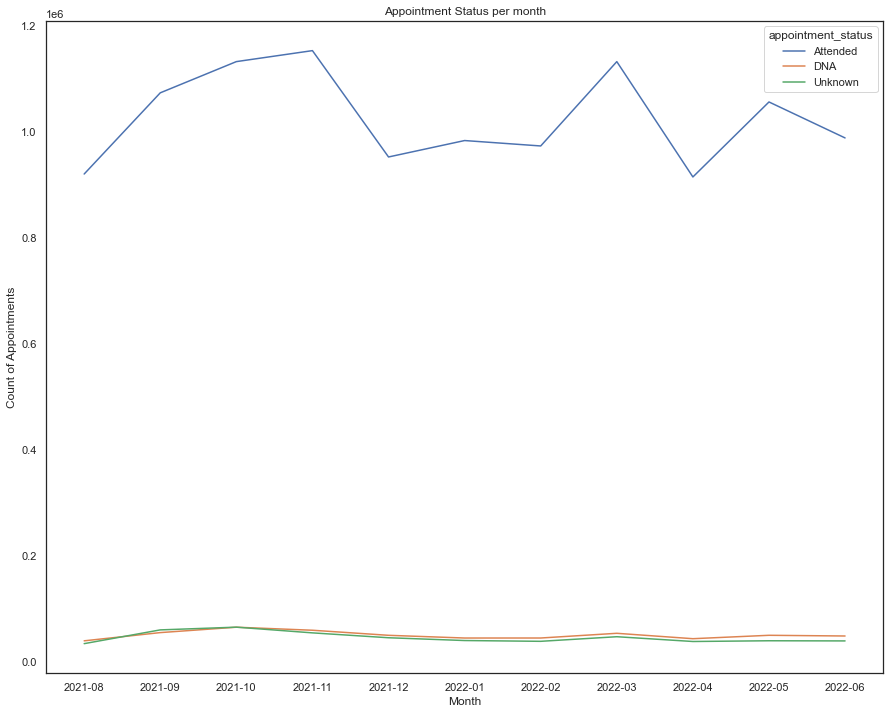

In [250]:
ax = sns.lineplot(data=ar_agg_grpby, x="appointment_month", y="count_of_appointments", hue='appointment_status',
                  ci=None)

ax.set(xlabel = "Month",
       ylabel = "Count of Appointments",
       title = "Appointment Status per month")

# Save plot
plt.savefig('app_stat_month.png')

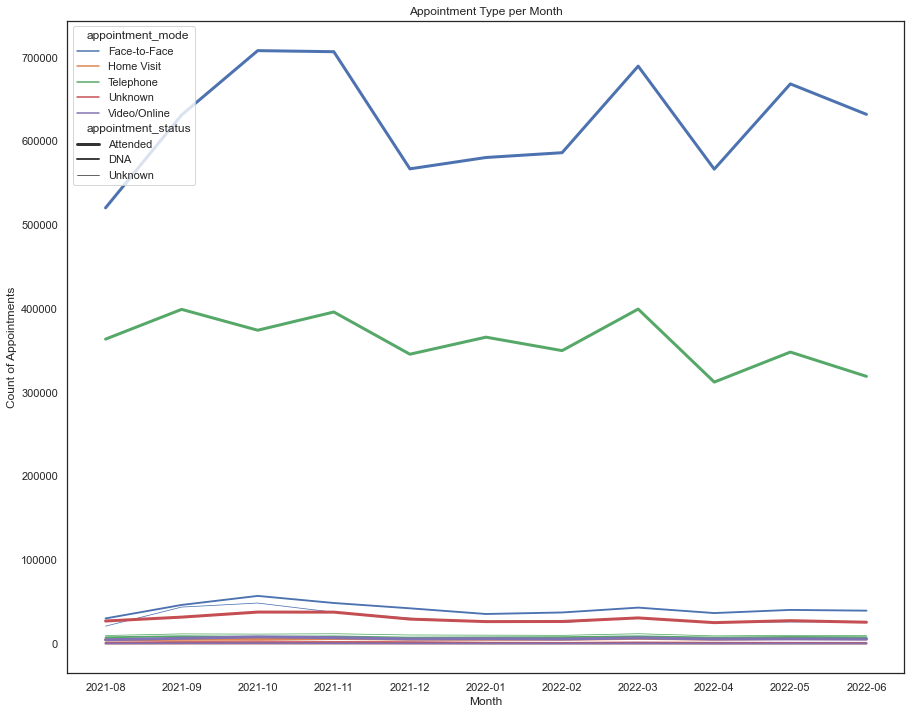

In [278]:
ax = sns.lineplot(data=ar_agg_grpby, x="appointment_month", y="count_of_appointments", hue = 'appointment_mode',
                  size = 'appointment_status', ci=None)

ax.set(xlabel = "Month",
       ylabel = "Count of Appointments",
       title = "Appointment Type per Month")

# Save plot
plt.savefig('app_stat_type_month.png')

**Question 4:** Are there changes in terms of appointment type and the busiest months?

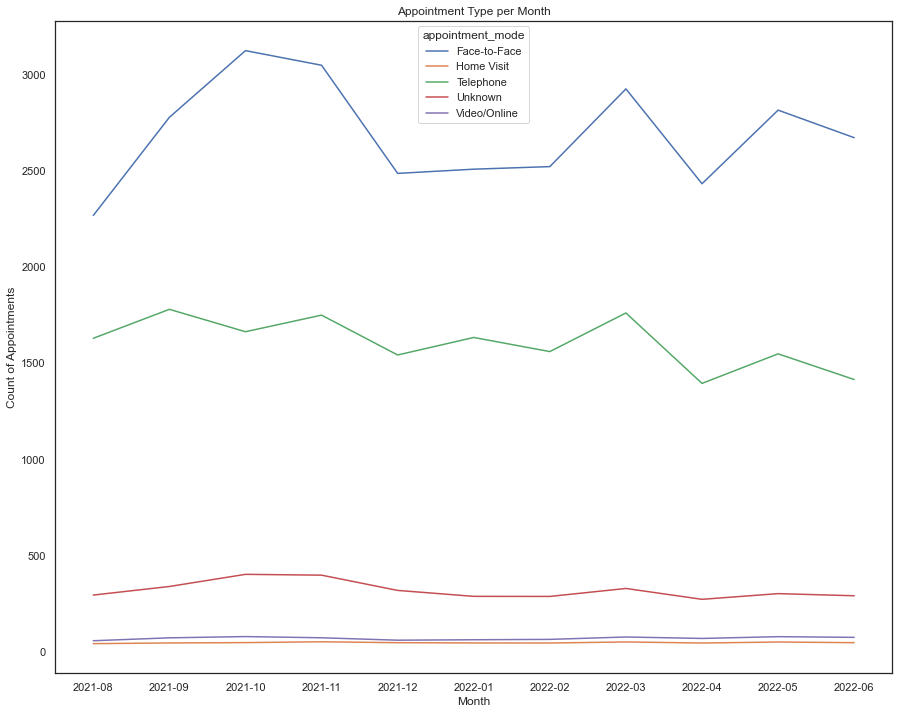

In [251]:
# Create a line plot to answer the question.
ax = sns.lineplot(data=df3, x="appointment_month", y="count_of_appointments", hue='appointment_mode',
                  ci=None)

ax.set(xlabel = "Month",
       ylabel = "Count of Appointments",
       title = "Appointment Type per Month")

# Save plot
plt.savefig('app_type_month.png')

**Question 5:** Are there any trends in time between booking an appointment?

In [196]:
ar_df_utiliz2 = ar_agg_grpby.assign(utiliz_percent=lambda x: round(
    x.count_of_appointments / 30 / 1200000, 2))

ar_df_utiliz2

count_of_appointments  \
appointment_month hcp_type appointment_status time_between_book_and_appointment                          
2021-08           GP       Attended           1 Day                                            1001721   
                                              15  to 21 Days                                    447249   
                                              2 to 7 Days                                      1975784   
                                              22  to 28 Days                                    227425   
                                              8  to 14 Days                                     900068   
...                                                                                                ...   
2022-06           Unknown  Unknown            22  to 28 Days                                      3646   
                                              8  to 14 Days                                       7091   
                                              More than 28 Days                                   6075   
                                              Same Day                                           21905   
                                              Unknown / Data Quality                               325   

                                                                                 utiliz_percent  
appointment_month hcp_type appointment_status time_between_book_and_appointment                  
2021-08           GP       Attended           1 Day                                        0.03  
                                              15  to 21 Days                               0.01  
                                              2 to 7 Days                                  0.05  
                                              22  to 28 Days                               0.01  
                                              8  to 14 Days                                0.03  
...                                                                                         ...  
2022-06           Unknown  Unknown            22  to 28 Days                               0.00  
                                              8  to 14 Days                                0.00  
                                              More than 28 Days                            0.00  
                                              Same Day                                     0.00  
                                              Unknown / Data Quality                       0.00  

[792 rows x 2 columns]

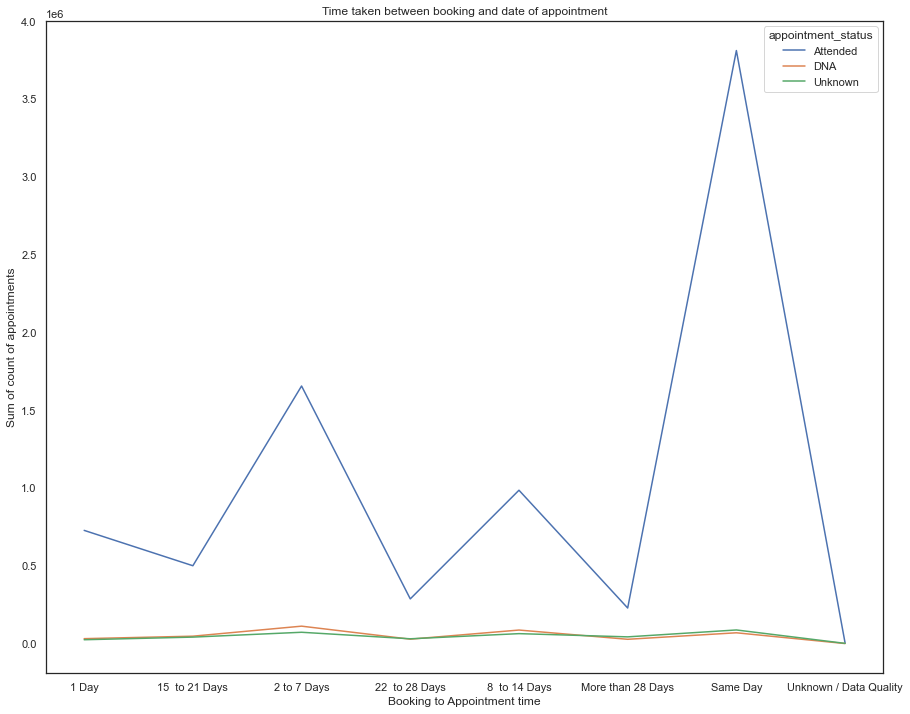

In [258]:
ax = sns.lineplot(data=ar_df_utiliz2, x="time_between_book_and_appointment", y="count_of_appointments",
                  hue='appointment_status', ci=None)

ax.set(xlabel="Booking to Appointment time",
       ylabel="Sum of count of appointments",
       title="Time taken between booking and date of appointment")

# Save plot
plt.savefig('app_time_taken.png')

**Question 6:** How do the spread of service settings compare?

In [81]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.

In [222]:
nc_ss.head()

,service_setting,appointment_month,count_of_appointments
0,Primary Care Network,2021-08,3
1,Other,2021-08,7
2,General Practice,2021-08,79
3,General Practice,2021-08,725
4,General Practice,2021-08,2


In [235]:
# View the DataFrame.
new_df = nc_ss_grpby.reset_index()

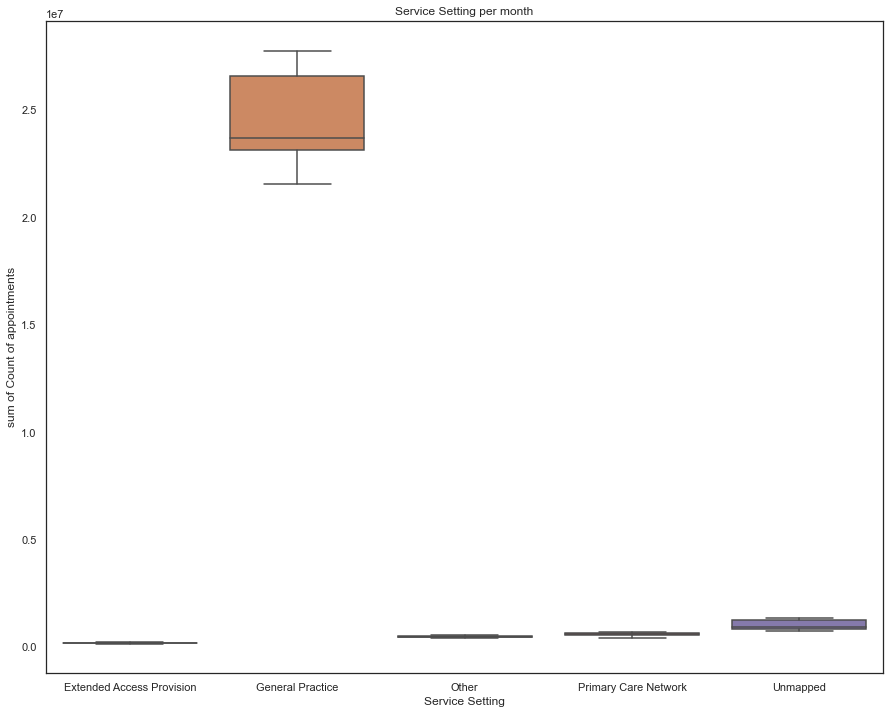

In [253]:
# Create a boxplot to investigate spread of service settings.
ax = sns.boxplot(data=new_df, y="count_of_appointments", x="service_setting")

ax.set(xlabel="Service Setting",
       ylabel="sum of Count of appointments",
       title="Service Setting per month")

# Save plot
plt.savefig('box_ss.png')

In [244]:
# DataFrame without General Practice.
new_df_2 = new_df[new_df["service_setting"] != "General Practice"]

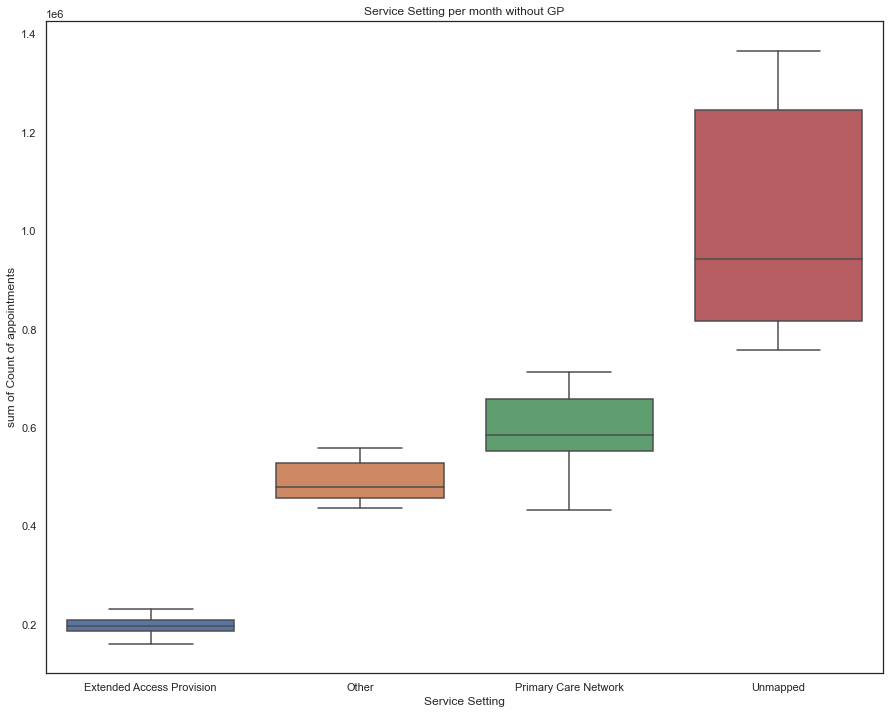

In [254]:
# Create a boxplot to investigate the service settings without GP.

ax = sns.boxplot(data=new_df_2, y="count_of_appointments", x="service_setting")

ax.set(xlabel="Service Setting",
       ylabel="sum of Count of appointments",
       title="Service Setting per month without GP")

# Save plot
plt.savefig('box_wogp.png')

# 

### Summary

> Based on the available data, it is clear that the utilization of appointments was between 70 to 80%. That is 20 to 30% below what the NHS can handle. It is unclear if this dip in utilization is due to a staff shortage or resources. So further data is required on daily staff availability. This can help us to understand if the Unknown in appointment status is because there was a staff shortage at the facility and the patients had to be sent back.
 
> The General practices and the other staff type are the HCPs having the most appointments monthly. The busiest month seems to be October of 2021.
 
> Same day appointments are obviously the most attended, followed by 2 to 7days, and 8 to 14days. The longer the appointment date is from booking, the less chance that the patient will attend.
 
> Among the service setting, General Practice seems to be the one with most number of appointments followed by the unmapped category.